# Neural network inference via invariant prediction
Here we infer a set of connections in the presence of hidden units by taking advantage of the different statistics exhibited by direct and indirect connections under changes in environment (common input).

Let's begin by inferring a network naively using a GLM with coupling terms.

In [1]:
%Add things to path
startup

In [2]:
%Load data
connectivity_path = './connectivity_net_sim_3_groups_rate_drive_4.mat';
%spiking_path = './output_V4/Net_sim_3_groups_rate_driven_4_noSTDP_spiketimes_batch_1_10sec.mat';
spiking_path = './output_V4/Net_sim_3_groups_rate_driven_4_noSTDP_spiketimes_batch_1.mat';
%otherdata_path = './output_V4/Net_sim_3_groups_rate_driven_4_noSTDP_10sec.mat';
otherdata_path = './output_V4/Net_sim_3_groups_rate_driven_4_noSTDP.mat';

load(spiking_path);
load(otherdata_path);
load(connectivity_path);

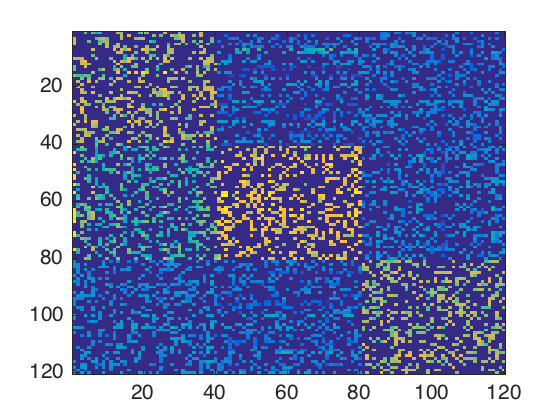

In [3]:
%The full connectivity matrix
imagesc(J)

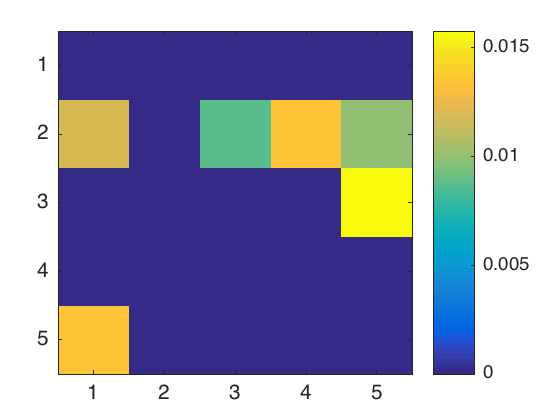

In [4]:
%Pick some neurons to estimate the connectivity matrix for
ii = [2, 10, 15, 17, 18];
Jii = J(ii,ii);
%Fairly sparse... some of which are not directly connected at all
imagesc(Jii);
colorbar

In [5]:
%Generate spike trains 
binsize = 0.002; %in seconds
nK = 40; %length of spike history filter, in units of binsize

%Truncate to a smaller set of neurons
spiketimes = spiketimes(ii);

%Bin spike times
N = length(spiketimes);
sim_time = time(2);

%Chop in half...
sim_time = sim_time/2;

T = round(sim_time/binsize);

%S -- spike trains -- N x T
S = zeros(N,T);
for n = 1:length(ii)
    i = ii(n);
	for idx = 1:length(spiketimes{n})
		t = max(1,round(spiketimes{n}(idx)/binsize));
		if t <= T
			S(n,t) = S(n,t) + 1;
		end
	end
end


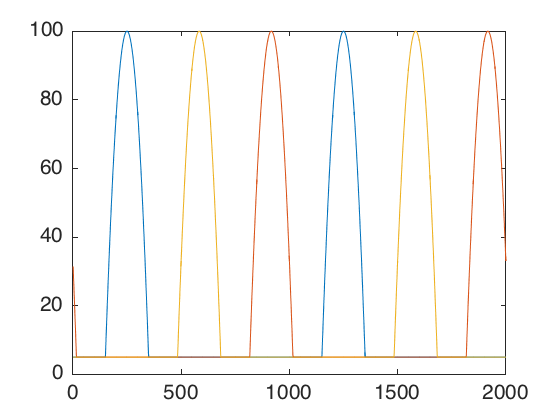

In [16]:
%Plot input rates
plot(RATES_array(:,1:2000)')

In [15]:
const = 'on';
nK_pos = 0;
%Load test preprocessed data
processed.binnedspikes = S'; 
processed.rates = processed.binnedspikes/binsize;
processed.binsize = binsize;
processed.tspks = spiketimes;
processed.unitnames = {};
processed.torque = zeros(T, 2);
processed.dtorque = zeros(T, 2);
processed.ddtorque = zeros(T, 2);
for n = 1:N
    processed.unitnames{n} = num2str(ii(n));
end
data = filters_sprc_pos_network(processed, nK, nK_pos);

In [ ]:
model = MLE_glmfit_network(data, const);

In [1]:
%Plot filters
rcn = size(data.rcbasis,1);
tn = size(data.rcbasis,2);
sumconn = zeros(N,N);
for i = 1:N
    for j = 1:N
        subplot(N,N,(i-1)*N+j)
        jj = (((j-1)*rcn+1):(j*rcn))+1;
        tt = binsize*(1:tn)-binsize*tn;
        filter = data.spbasis*model.b_hat(i,jj)';
        plot(tt,filter)
        set(gca,'YTickLabel','')
        sumconn(i,j) = sum(abs(filter));
    end
end

Undefined variable "data" or class "data.rcbasis".


In [ ]:
%Plot a heatmap of the sum of the interactions
subplot(1,2,1)
imagesc(sumconn);
title('Inferred coupling')
subplot(1,2,2)
imagesc(Jii);
title('True connectivity')

In [ ]:
%Pretty much useless....
%Let's apply Granger causality to the network
whos

In [ ]:
%Apply transfer entropy toolbox to the network

In [ ]:
%Apply Invariant network inference